Do PCA on VGG16 Output to see if similar watches are clustered together

In [10]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from sklearn.metrics.pairwise import cosine_similarity
from keras.models import load_model

%matplotlib inline

Open Relevant Files

In [11]:
f_vecs = np.load('inceptionv3_raw_feature_vectors.npy')
watch_names = pd.read_csv('inceptionv3_raw_feature_vectors_names.csv',index_col=0)

In [12]:
#watch_names = watch_names.iloc[:-1,:] #Excluded last model when running before

In [13]:
watch_names

,file_name
0,bracelet/TagHeuerCarreraCaliber5war215dbd0784.jpg
1,bracelet/BulgariSerpentiTubogas35mmsp35c7sds1t...
2,bracelet/RolexDayDate36mmYellowGoldDiamondBeze...
3,bracelet/ChopardImperialeQuartz36mm3885323004.jpg
4,bracelet/LonginesFlagshipAutomaticL48743377.jpg
5,bracelet/BreitlingChronomat44IB011012a696ss.jpg
6,bracelet/BreguetMarineRoyale5847br32rz0.jpg
7,bracelet/RaymondWeilToccata34mm5388sts97081.jpg
8,bracelet/RolexDatejust36mmStainlessSteel116234...
9,bracelet/BreitlingChronolinerm2431013bf02159m.jpg


In [14]:
np.shape(f_vecs)

(10456, 2048)

Compute Cosine Similarities

In [15]:
dists = cosine_similarity(f_vecs) 

In [16]:
np.shape(dists)

(10456, 10456)

In [17]:
dist_df = pd.DataFrame(data = dists)

In [18]:
dist_df.index = watch_names['file_name'].iloc[:-1]
dist_df.columns = watch_names['file_name'].iloc[:-1]

Function for finding n closest matches

In [19]:
def get_similar(watchs, n=None):
    """
    calculates which watchs are most similar to the watchs provided. Does not return
    the watchs that were provided
    
    Parameters
    ----------
    watchs: list
        some watchs!
    
    Returns
    -------
    ranked_watchs: list
        rank ordered watchs
    """
    watchs = [watch for watch in watchs if watch in dist_df.columns]
    watchs_summed = dist_df[watchs].apply(lambda row: np.sum(row), axis=1)
    watchs_summed = watchs_summed.sort_values(ascending=False)
    ranked_watchs = watchs_summed.index[watchs_summed.index.isin(watchs)==False]
    ranked_watchs = ranked_watchs.tolist()
    if n is None:
        return ranked_watchs
    else:
        return ranked_watchs[:n]

Random Image from Watch store Database

(-0.5, 399.5, 399.5, -0.5)

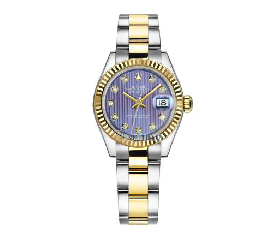

In [20]:
f_path = 'f_vec_data_padded/train/'
starting_name = np.random.choice(dist_df.index)
img=mpimg.imread(f_path + starting_name )
imgplot = plt.imshow(img)
plt.axis('off')

Recommendations

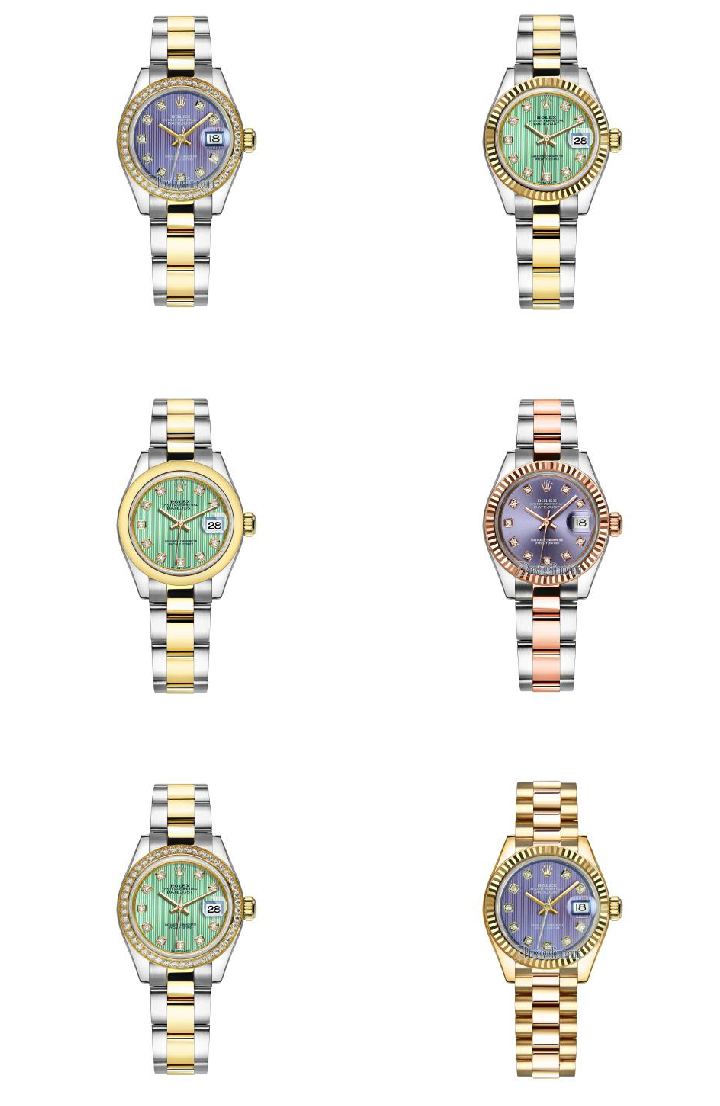

In [21]:
n = 6
recommend_names = get_similar([starting_name],n=n)

r = int(np.ceil(n/2))
c = 2
plt.subplots(nrows=r, ncols=c,figsize=(12,20))

for ix, f_name in enumerate(recommend_names):
    plt.subplot(r,c,ix+1)
    img=mpimg.imread(f_path + f_name)
    imgplot = plt.imshow(img)
    plt.axis('off')

__What if the image isn't perfect__

First Load Model

In [22]:
model = load_model('inceptionv3_raw_2048.h5')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [23]:
def prepare_image(image_path):
    
    im = cv2.imread(image_path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (299, 299)).astype(np.float32)
    im = im/255
#     im[:,:,0] -= 103.939
#     im[:,:,1] -= 116.779
#     im[:,:,2] -= 123.68
#    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    return im

In [24]:
#img = prepare_image(f_path+starting_name)

In [25]:
test_path = 'test_pics/'
test_files = os.listdir(test_path) 
test_file = test_path + np.random.choice(test_files)
# test_file = test_path +'Bulgari-Octo-Finissimo-Automatic-Thinnest-Titanium-Sand-Blasted-2017-aBlogtoWatch-22.jpg'
#test_file = test_path +'cocktail_watch.JPG'
#test_file = test_path +'james_bonds_wrist.png'
#test_file = test_path +'ga054-omega-seamaster-planet-ocean-skyfall.jpg'

(-0.5, 319.5, 239.5, -0.5)

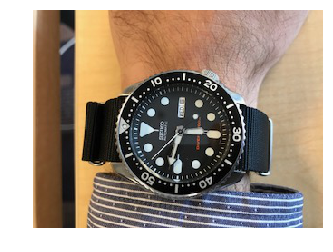

In [26]:
img2show=mpimg.imread(test_file)
imgplot = plt.imshow(img2show)
plt.axis('off')

In [27]:
img = prepare_image(test_file)
out = model.predict(img)
similarities = cosine_similarity(out,f_vecs) 
top_matches = np.array(similarities).argpartition(-n)[0][-n:]

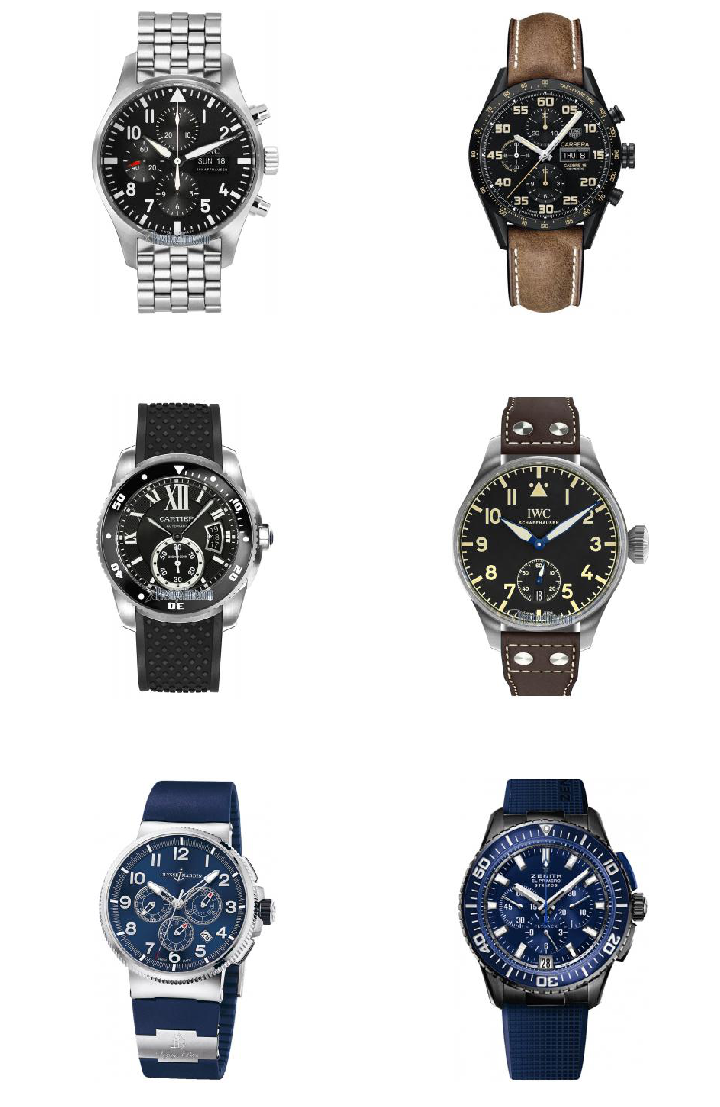

In [28]:
recommend_names = dist_df.columns[top_matches]

r = int(np.ceil(n/2))
c = 2
plt.subplots(nrows=r, ncols=c,figsize=(12,20))

for ix, f_name in enumerate(recommend_names):
    plt.subplot(r,c,ix+1)
    img=mpimg.imread(f_path + f_name)
    imgplot = plt.imshow(img)
    plt.axis('off')